# Breast Cancer Prediction Model: Tumor type

## Importer les bibliothèques nécessaires.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib  
import os
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [17]:
os.getcwd()

'c:\\Users\\arago\\Documents\\Study\\Projects\\Cancer_Predection_App'

## Importer la base de données

In [18]:
data = pd.read_csv('breast_cancer_bd.csv')


**About this Dataset**  
This breast cancer database was obtained from the University of Wisconsin Hospitals, Madison from Dr. William H. Wolberg.

**Attributes**  
Attributes 1 through 10 have been used to represent instances. Each instance has one of 2 possible classes: benign or malignant.

**Content**  

| **Attribute**                              | **Domain**          |
|--------------------------------------------|---------------------|
| 1. **Sample code number**                  | id number           |
| 2. **Clump Thickness**                     | 1 - 10              |
| 3. **Uniformity of Cell Size**             | 1 - 10              |
| 4. **Uniformity of Cell Shape**            | 1 - 10              |
| 5. **Marginal Adhesion**                   | 1 - 10              |
| 6. **Single Epithelial Cell Size**         | 1 - 10              |
| 7. **Bare Nuclei**                         | 1 - 10              |
| 8. **Bland Chromatin**                     | 1 - 10              |
| 9. **Normal Nucleoli**                     | 1 - 10              |
| 10. **Mitoses**                            | 1 - 10              |
| 11. **Class** (2 for benign, 4 for malignant) |                     |

**Class Distribution**  
- **Benign:** <span style="color:blue;">458 (65.5%)</span>  
- **Malignant:** <span style="color:red;">241 (34.5%)</span>  


In [19]:
data.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


- **Clump Thickness**: Refers to the thickness of cell clusters. Higher values may indicate the presence of cancerous cells as they tend to form clumps.

- **Uniformity of Cell Size**: Cancerous cells often vary in size. This feature measures how uniform the sizes of the cells are.

- **Uniformity of Cell Shape**: Similar to cell size, cancerous cells often vary in shape. This feature assesses the consistency in the shape of the cells.

- **Marginal Adhesion**: In healthy tissue, cells stick to each other. A decrease in adhesion can be a sign of malignancy.

- **Single Epithelial Cell Size**: Measures the size of individual epithelial cells, which tend to be larger in the presence of cancer.

- **Bare Nuclei**: Refers to the presence of nuclei without the surrounding cytoplasm. Bare nuclei are more commonly found in malignant tumors.

- **Bland Chromatin**: Chromatin is the material that makes up chromosomes. In cancerous cells, chromatin can appear less structured or more uniform.

- **Normal Nucleoli**: Nucleoli are small, dense structures within the nucleus. Larger or more numerous nucleoli are often a sign of cancer.

- **Mitoses**: Refers to cell division. A higher number of mitoses is usually indicative of rapid cell growth, which can signal cancer.


## Preprocessing

In [20]:
print("les diemsions de la BDD : ", data.shape)
print("\n\nla liste des variables : \n", data.columns) 
print("\n\nles types de variables : \n", data.dtypes)

les diemsions de la BDD :  (699, 11)


la liste des variables : 
 Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')


les types de variables : 
 Sample code number              int64
Clump Thickness                 int64
Uniformity of Cell Size         int64
Uniformity of Cell Shape        int64
Marginal Adhesion               int64
Single Epithelial Cell Size     int64
Bare Nuclei                    object
Bland Chromatin                 int64
Normal Nucleoli                 int64
Mitoses                         int64
Class                           int64
dtype: object


In [21]:
data = data.drop('Sample code number', axis=1)

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Clump Thickness              699 non-null    int64 
 1   Uniformity of Cell Size      699 non-null    int64 
 2   Uniformity of Cell Shape     699 non-null    int64 
 3   Marginal Adhesion            699 non-null    int64 
 4   Single Epithelial Cell Size  699 non-null    int64 
 5   Bare Nuclei                  699 non-null    object
 6   Bland Chromatin              699 non-null    int64 
 7   Normal Nucleoli              699 non-null    int64 
 8   Mitoses                      699 non-null    int64 
 9   Class                        699 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 54.7+ KB


In [23]:
data.describe()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bland Chromatin,Normal Nucleoli,Mitoses,Class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [24]:
print(data['Bare Nuclei'].unique())

['1' '10' '2' '4' '3' '9' '7' '?' '5' '8' '6']


In [25]:
data = data.replace('?', np.nan)

data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Clump Thickness              699 non-null    int64  
 1   Uniformity of Cell Size      699 non-null    int64  
 2   Uniformity of Cell Shape     699 non-null    int64  
 3   Marginal Adhesion            699 non-null    int64  
 4   Single Epithelial Cell Size  699 non-null    int64  
 5   Bare Nuclei                  683 non-null    float64
 6   Bland Chromatin              699 non-null    int64  
 7   Normal Nucleoli              699 non-null    int64  
 8   Mitoses                      699 non-null    int64  
 9   Class                        699 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 54.7 KB


In [26]:
print(data.isnull().sum())

Clump Thickness                 0
Uniformity of Cell Size         0
Uniformity of Cell Shape        0
Marginal Adhesion               0
Single Epithelial Cell Size     0
Bare Nuclei                    16
Bland Chromatin                 0
Normal Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64


<Axes: >

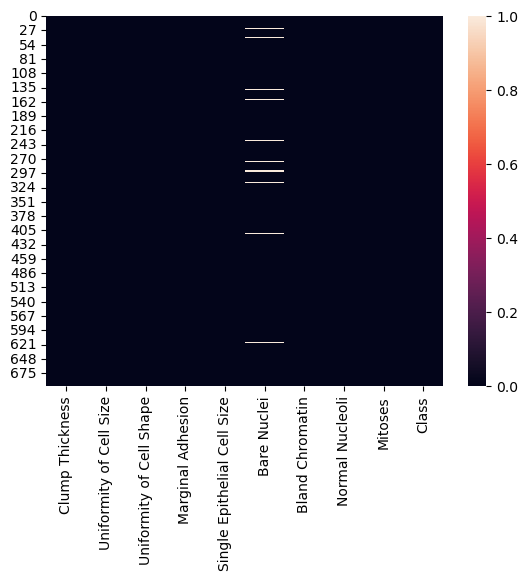

In [27]:
sns.heatmap(data.isnull())

In [28]:
data['Bare Nuclei'] = data['Bare Nuclei'].fillna(data['Bare Nuclei'].median())

In [29]:
print(data.isnull().sum())

Clump Thickness                0
Uniformity of Cell Size        0
Uniformity of Cell Shape       0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Bland Chromatin                0
Normal Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


<Axes: >

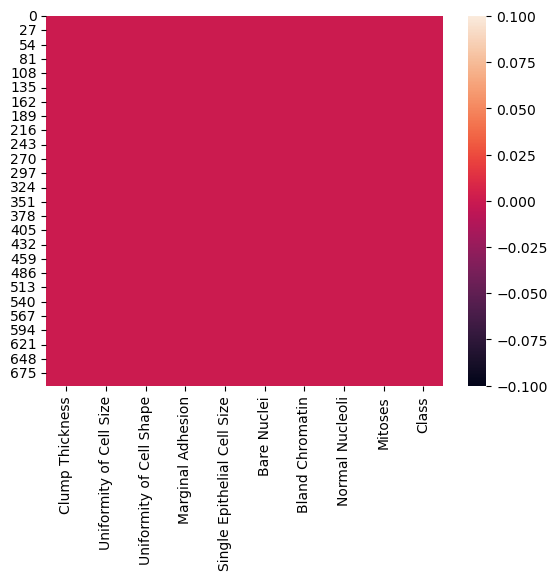

In [30]:
sns.heatmap(data.isnull())

<Axes: >

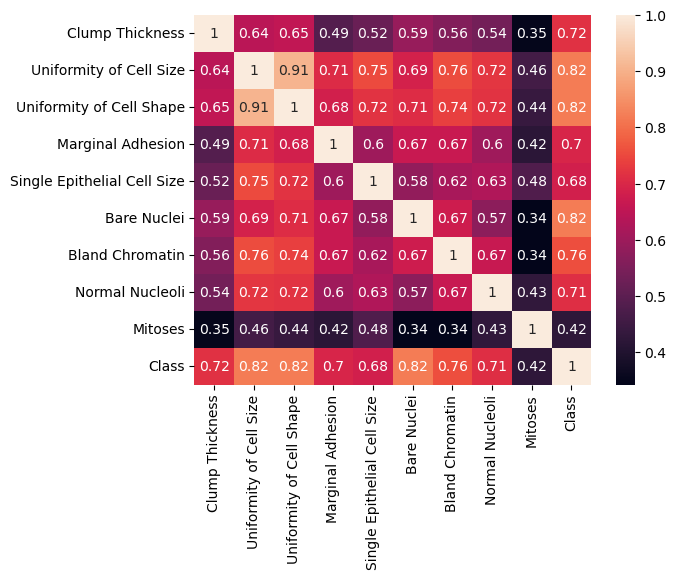

In [31]:
sns.heatmap(data.corr(),annot=True)

#### Interpretation of the Correlation Matrix

The correlation matrix provides insights into the relationships between various attributes related to breast cancer data. Each value in the matrix indicates the strength and direction of the linear relationship between pairs of attributes, ranging from -1 to 1. A value close to 1 implies a strong positive correlation, while a value close to -1 implies a strong negative correlation. A value around 0 indicates no correlation.

###### Key Observations

- **Clump Thickness**: 
  - **Highest Correlation**: Class (0.716) 
  - This suggests that as the clump thickness increases, the likelihood of a malignant class also increases.
  
- **Uniformity of Cell Size**: 
  - **Highest Correlation**: Uniformity of Cell Shape (0.907) 
  - This indicates a very strong relationship between cell size uniformity and cell shape uniformity, suggesting that changes in one may reflect changes in the other.

- **Uniformity of Cell Shape**: 
  - **Highest Correlation**: Uniformity of Cell Size (0.907) 
  - Similar to above, the relationship with cell size reinforces the importance of uniformity in both dimensions for assessing malignancy risk.

- **Marginal Adhesion**: 
  - **Highest Correlation**: Single Epithelial Cell Size (0.600) 
  - This indicates that lower adhesion may correlate with larger epithelial cell sizes, which can be a marker for malignancy.

- **Bare Nuclei**: 
  - **Highest Correlation**: Class (0.819) 
  - The strong correlation implies that the presence of bare nuclei is closely linked to malignant classifications, indicating their potential significance in diagnosis.

- **Bland Chromatin**: 
  - **Highest Correlation**: Class (0.757) 
  - Similar to bare nuclei, bland chromatin is also a significant indicator of the likelihood of malignancy.

- **Normal Nucleoli**: 
  - **Highest Correlation**: Class (0.712) 
  - The presence of normal nucleoli is another relevant feature that indicates the potential for malignant tumors.

- **Mitoses**: 
  - **Correlation with Class**: (0.423) 
  - While there is a positive correlation, it is relatively weaker compared to other attributes, indicating that mitotic activity is not as strong an indicator of malignancy as other features.

## Conclusion

Overall, attributes like **Bare Nuclei**, **Class**, and **Bland Chromatin** show the strongest correlations, suggesting that these features are crucial in distinguishing between benign and malignant cases. The high correlations among uniformity measurements further emphasize the importance of assessing these characteristics together when analyzing breast cancer data.


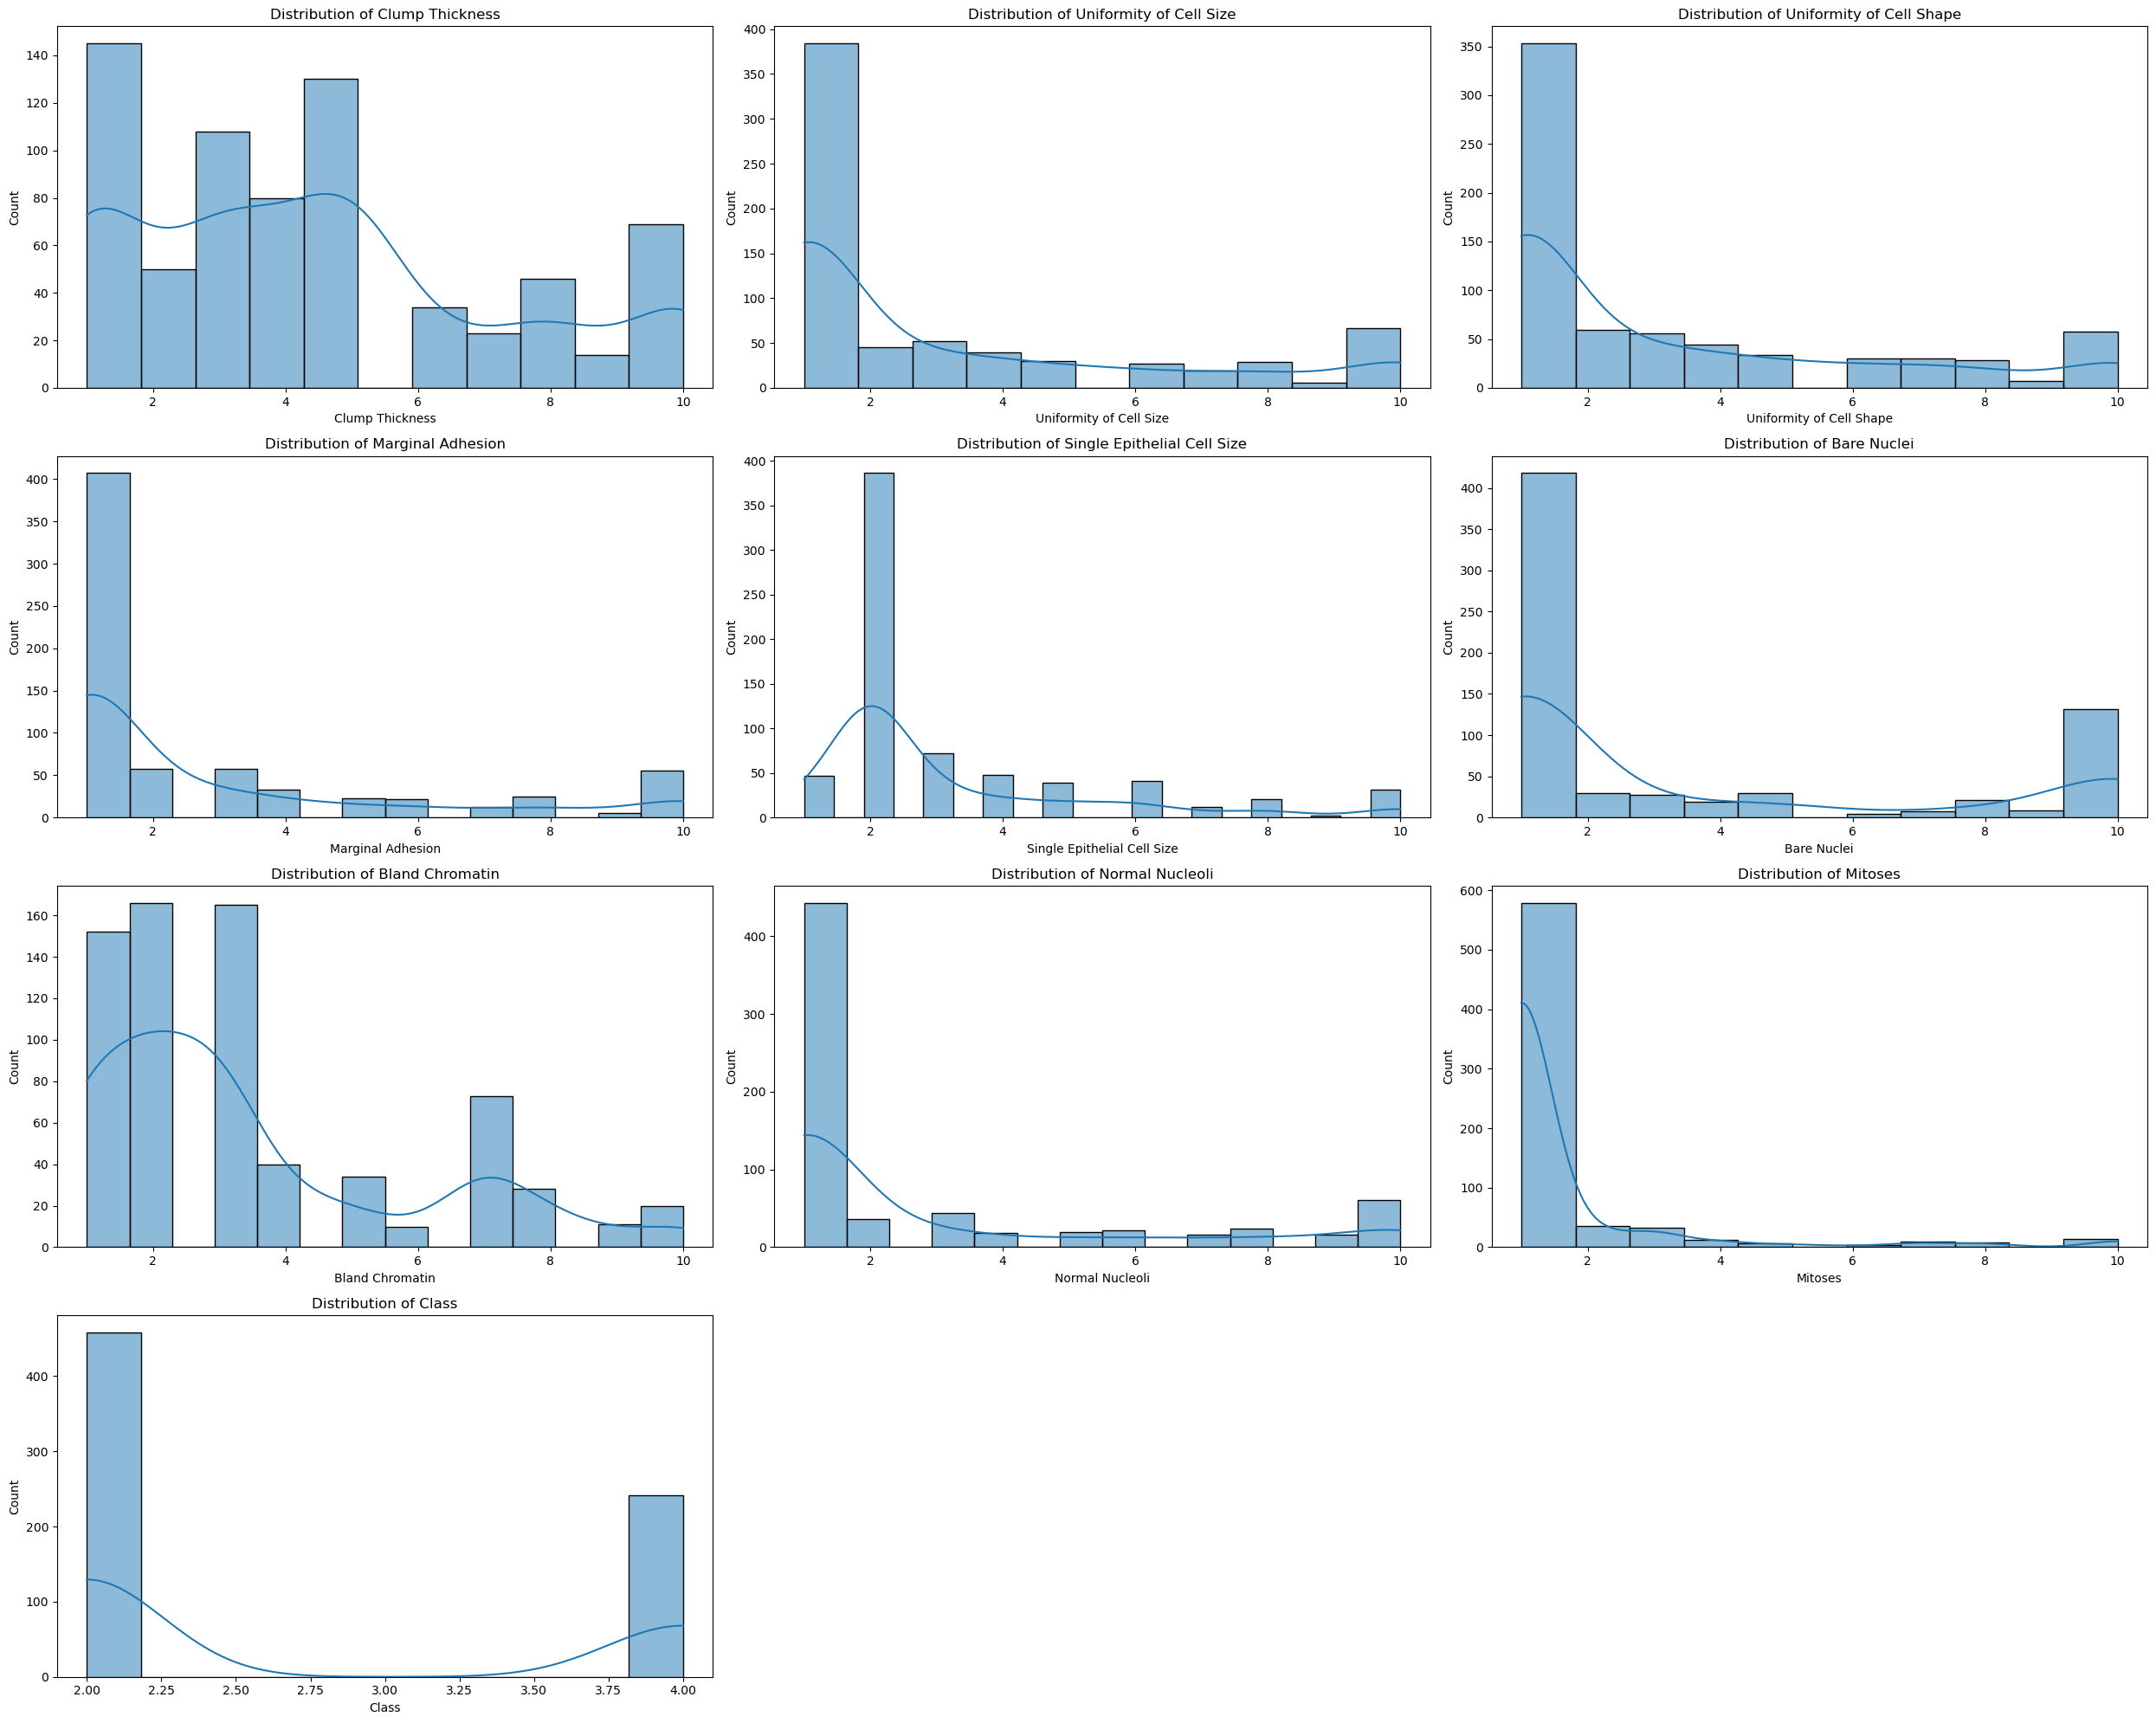

In [32]:
plt.figure(figsize=(25, 20))
num_columns = len(data.columns)
rows = (num_columns // 3) + (num_columns % 3 > 0)  # Calculate rows needed for the columns
for i, col in enumerate(data.columns, 1):
    plt.subplot(rows, 3, i)  # Adjust the number of rows dynamically
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


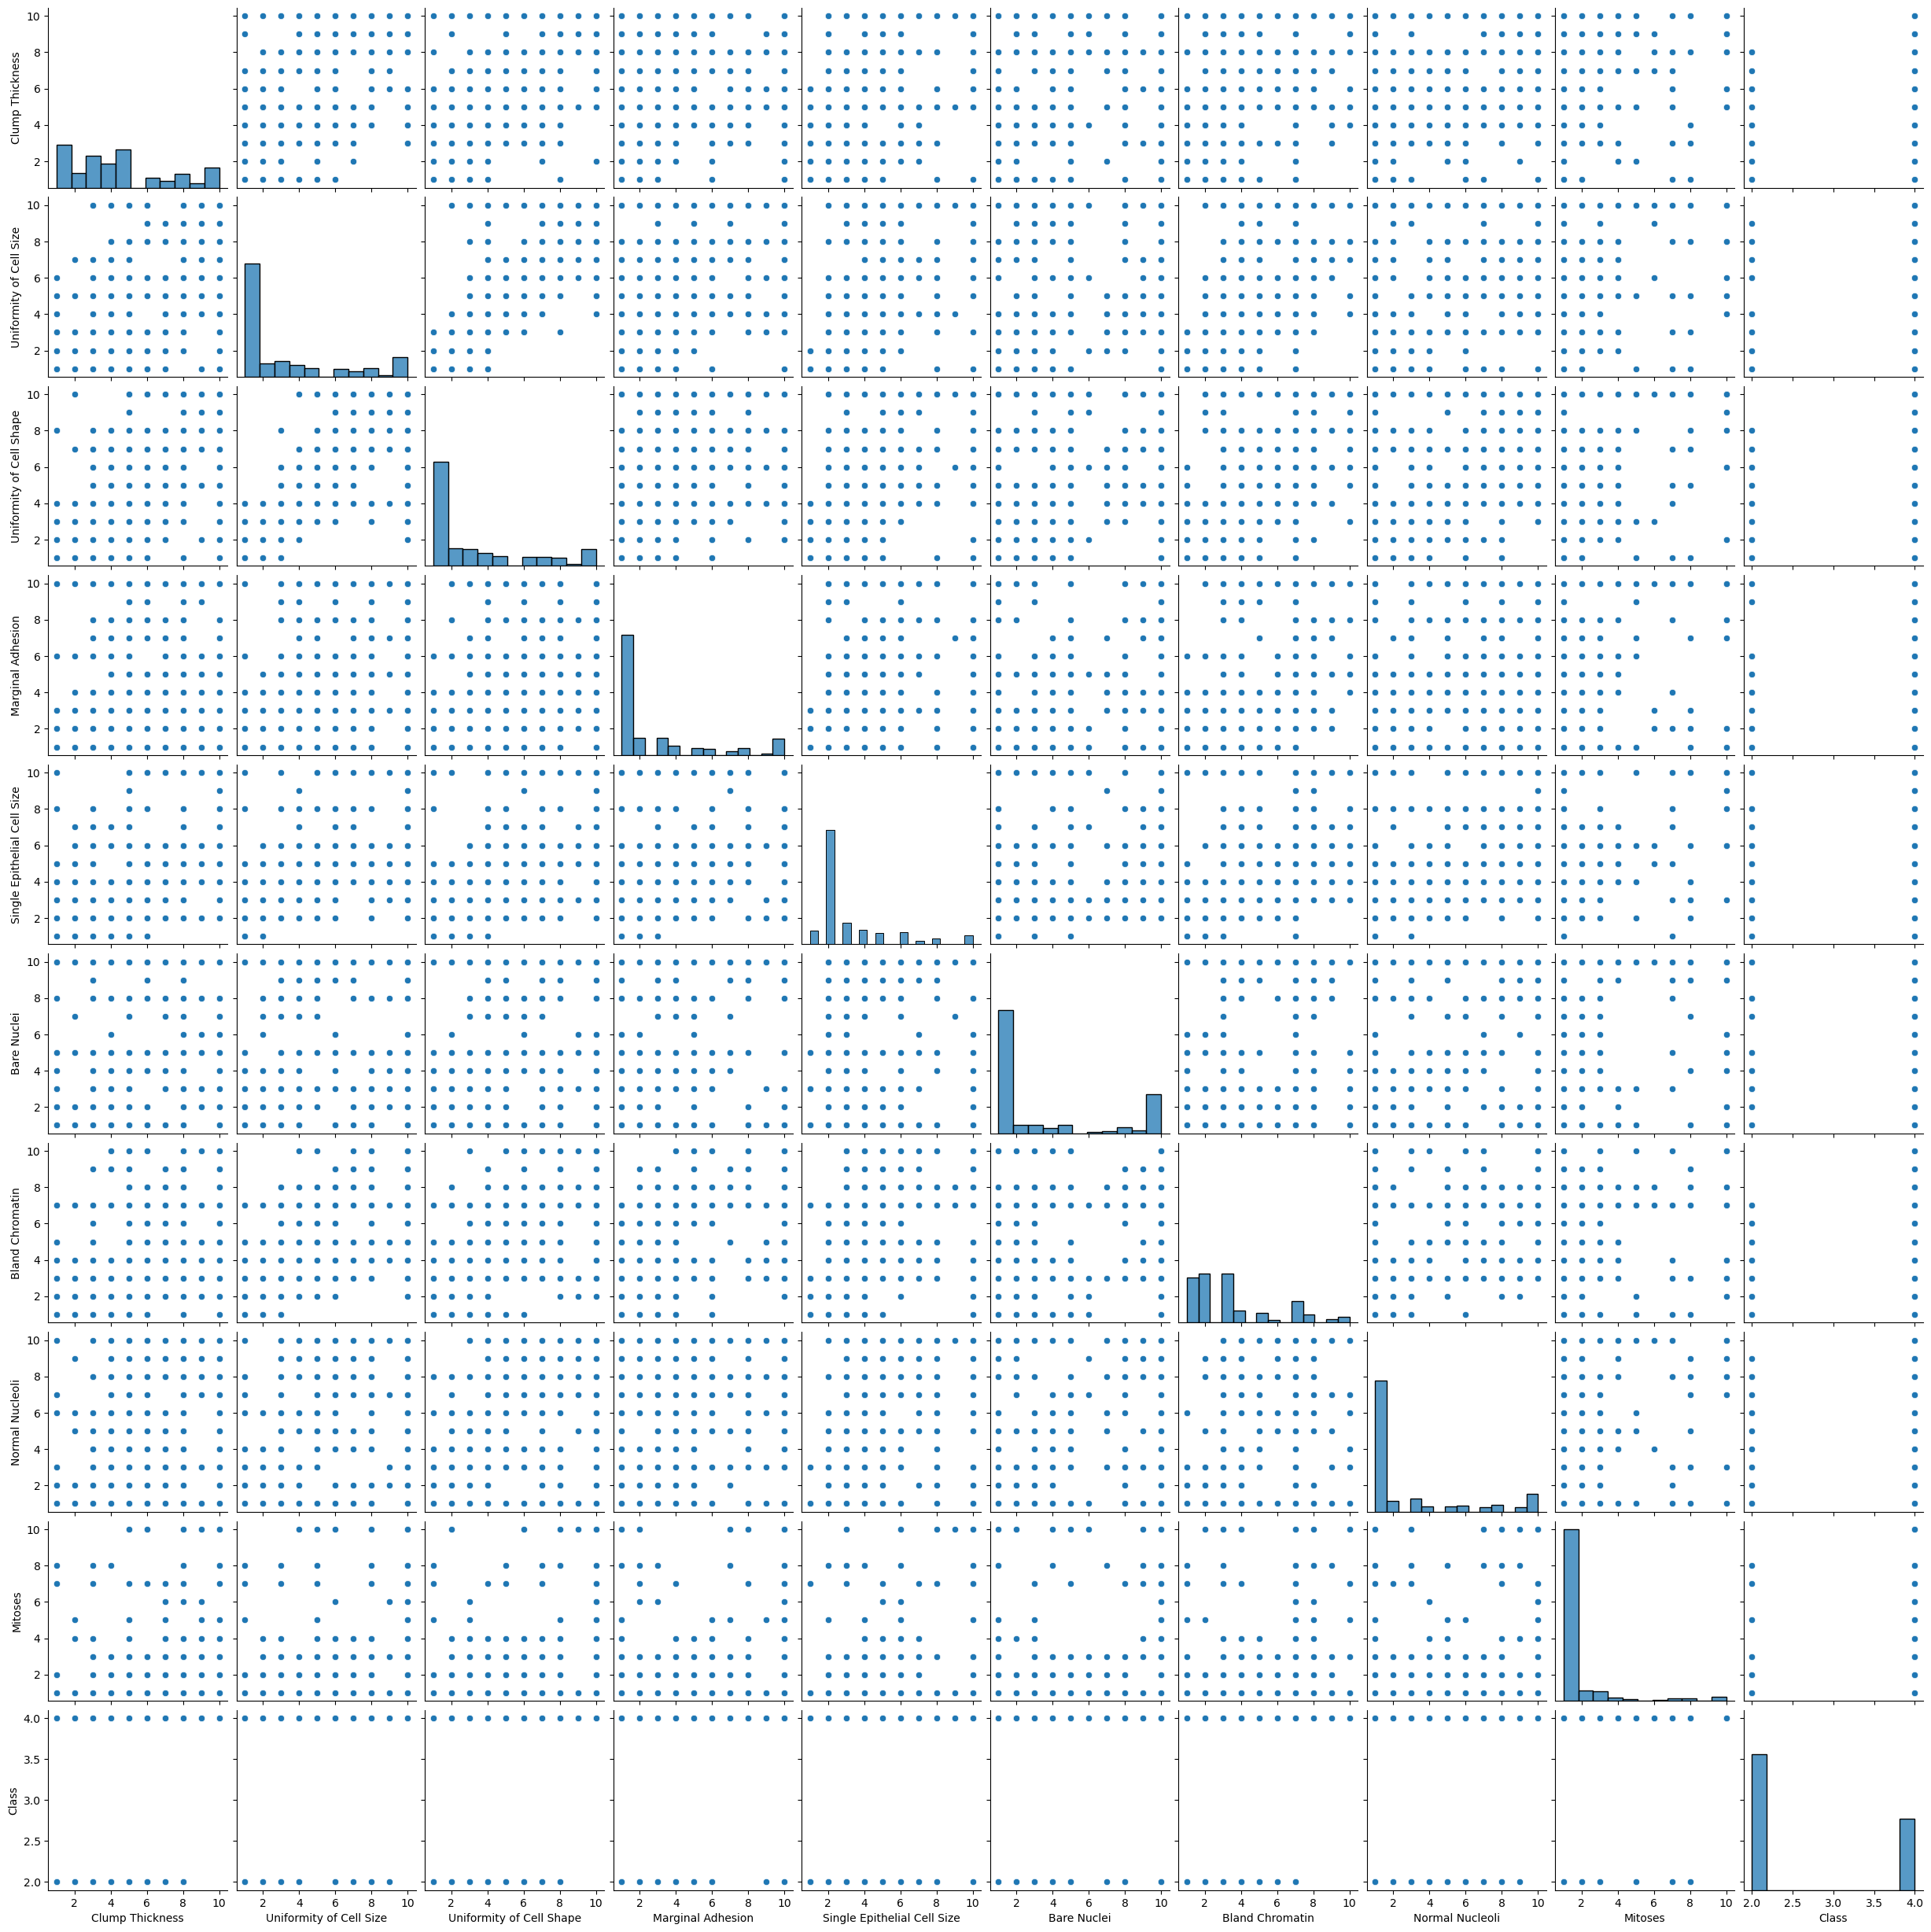

In [33]:
sns.pairplot(data)
plt.show()

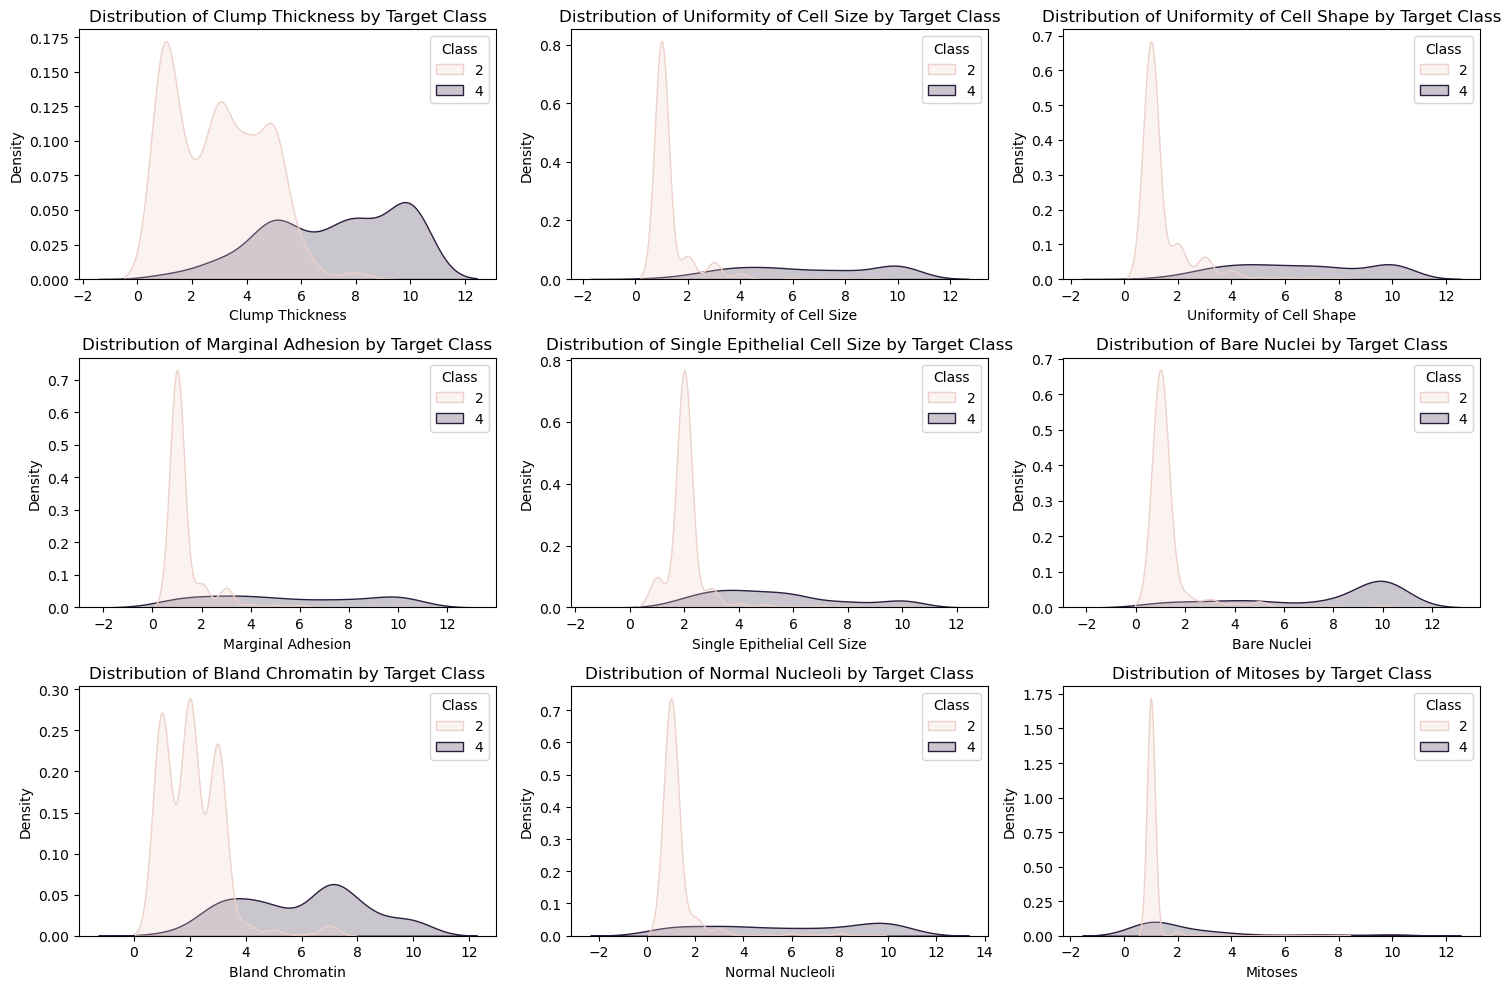

In [34]:
plt.figure(figsize=(15, 10))
for i, col in enumerate(data.columns[:-1], 1):  
    plt.subplot(3, 3, i)
    sns.kdeplot(data=data, x=col, hue='Class', fill=True) 
    plt.title(f'Distribution of {col} by Target Class')
plt.tight_layout()
plt.show()

## Séparer les variables en explicatives et à expliquer:

In [35]:
X = data.drop('Class', axis=1)
y = data['Class']

In [36]:
scaler = StandardScaler()

## Entrainer les models

In [37]:
# Train-test split and model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.linear_model import (
    LinearRegression, Ridge, Lasso, ElasticNet
)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'LASSO Regression': Lasso(),
    'Elastic Net': ElasticNet(),
    'Random Forest': RandomForestRegressor(random_state=42),
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    print(f"{name} R^2 score: {score:.4f}")

Linear Regression R^2 score: 0.8262
Ridge Regression R^2 score: 0.8262
LASSO Regression R^2 score: 0.6244
Elastic Net R^2 score: 0.7473
Random Forest R^2 score: 0.8459


In [38]:
# Fit the scaler on the training data and transform both the training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [39]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
# Define the ElasticNet model
elastic_net = ElasticNet()

# Create a wider parameter grid for ElasticNet
param_grid = {
    'alpha': np.logspace(-10, 10, 100),  # Wider range of alpha values
    'l1_ratio': np.linspace(0, 1, 11),  # Mix of Lasso (1) and Ridge (0)
}

# Set up Grid Search with cross-validation
grid_search = GridSearchCV(estimator=elastic_net, param_grid=param_grid, 
                           scoring='neg_mean_squared_error', 
                           cv=5, 
                           verbose=1, 
                           n_jobs=-1)  # Use all available cores

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Output best parameters and cross-validation score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)

# Use the best estimator to make predictions
best_elastic_net = grid_search.best_estimator_
y_pred = best_elastic_net.predict(X_test_scaled)
# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Test set MSE: ", mse)

# Calculate R² score
test_score = r2_score(y_test, y_pred)
print("Test Set R^2 Score:", test_score)

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
Best parameters found:  {'alpha': 0.04862601580065353, 'l1_ratio': 0.1}
Best cross-validation score (MSE):  0.15462709492758378
Test set MSE:  0.15273332598065525
Test Set R^2 Score: 0.8249372403964419


In [40]:
from sklearn.model_selection import GridSearchCV

# Initialize the RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1, verbose=2)

# Fit the model to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation R^2 Score:", best_score)

# Step 7: Evaluate the best model on the test set
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test_scaled)  # Use scaled test data
test_score = r2_score(y_test, y_pred)

print("Test Set R^2 Score:", test_score)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 200}
Best Cross-Validation R^2 Score: 0.8364542851232504
Test Set R^2 Score: 0.8570036245474715


In [41]:
# Save the best model and the scaler
joblib.dump(best_elastic_net, 'best_elastic_net.joblib')  # Save the best model
joblib.dump(scaler, 'scaler.joblib')  # Save the scaler

print("Model and scaler saved successfully.")

Model and scaler saved successfully.


## Analyse de modele obetenu

### Importance des Caractéristiques
Affiche l'importance de chaque caractéristique pour identifier celles qui influencent le plus les prédictions du modèle.

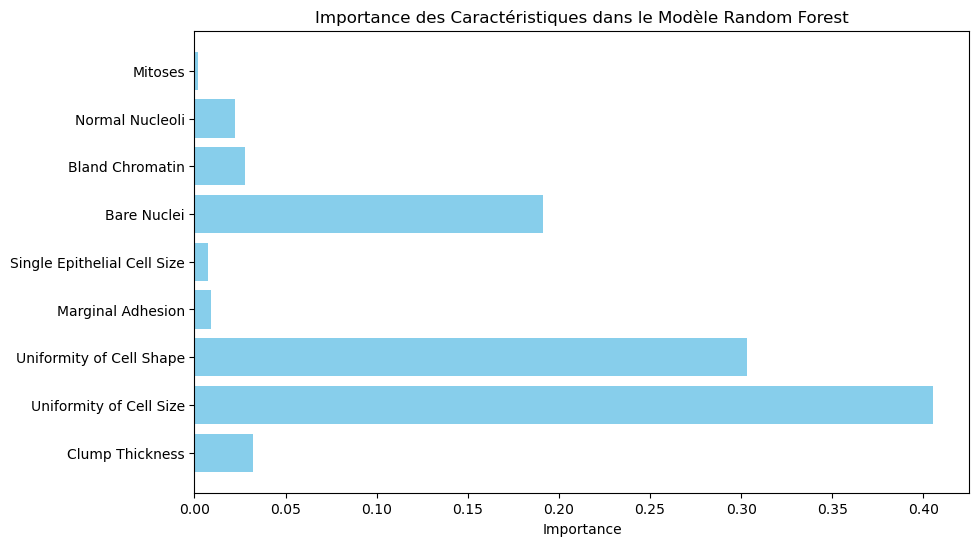

In [42]:
import matplotlib.pyplot as plt

# Importance des caractéristiques
importances = best_rf.feature_importances_
feature_names = [
    'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
    'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'
]

plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')
plt.title("Importance des Caractéristiques dans le Modèle Random Forest")
plt.show()

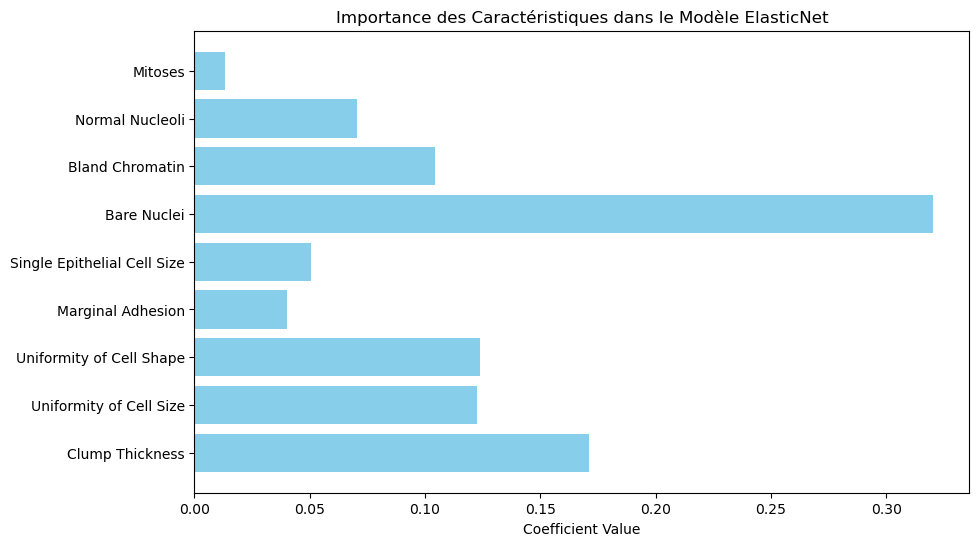

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Get the coefficients of the best ElasticNet model
coefficients = best_elastic_net.coef_

# Feature names (update if needed)
feature_names = [
    'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape', 
    'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 
    'Bland Chromatin', 'Normal Nucleoli', 'Mitoses'
]

# Plot the coefficients
plt.figure(figsize=(10, 6))
plt.barh(feature_names, coefficients, color='skyblue')
plt.xlabel('Coefficient Value')
plt.title("Importance des Caractéristiques dans le Modèle ElasticNet")
plt.show()


### Prédictions vs. Valeurs Réelles
Ce graphique montre la corrélation entre les prédictions du modèle et les valeurs réelles, ce qui permet de voir la précision du modèle.

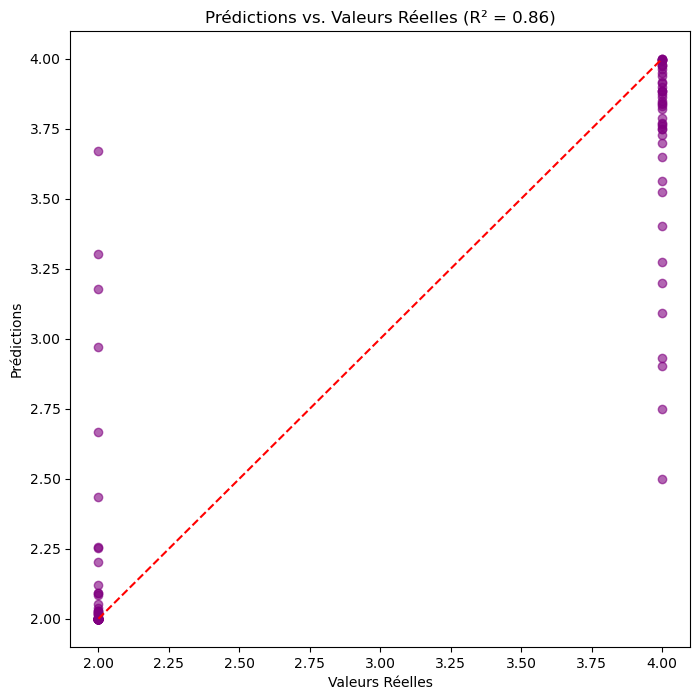

In [44]:
from sklearn.metrics import r2_score
import numpy as np

y_pred = best_rf.predict(X_test_scaled)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title(f"Prédictions vs. Valeurs Réelles (R² = {r2_score(y_test, y_pred):.2f})")
plt.show()

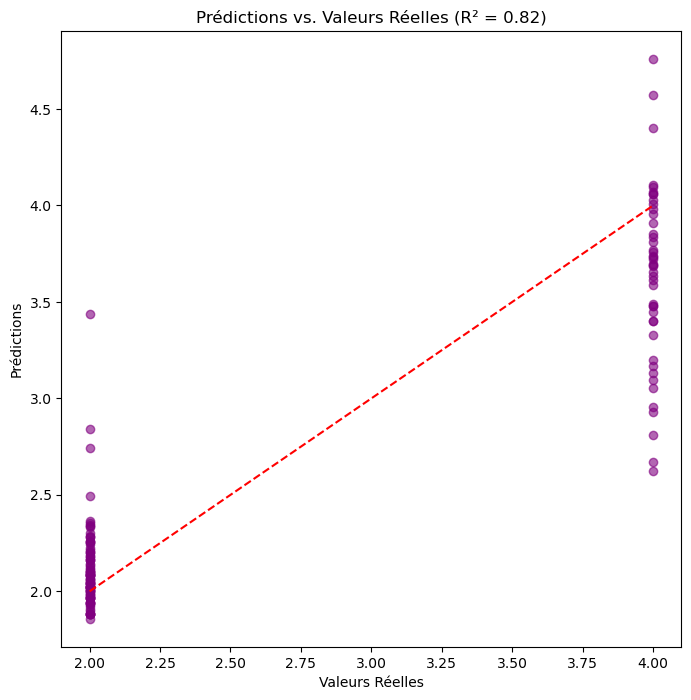

In [45]:
from sklearn.metrics import r2_score
import numpy as np

y_pred = best_elastic_net.predict(X_test_scaled)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r')
plt.xlabel("Valeurs Réelles")
plt.ylabel("Prédictions")
plt.title(f"Prédictions vs. Valeurs Réelles (R² = {r2_score(y_test, y_pred):.2f})")
plt.show()

### Erreur Résiduelle (Histogramme)
Cet histogramme montre les résidus, c'est-à-dire la différence entre les valeurs prédites et les valeurs réelles, permettant d’observer la distribution de l’erreur.


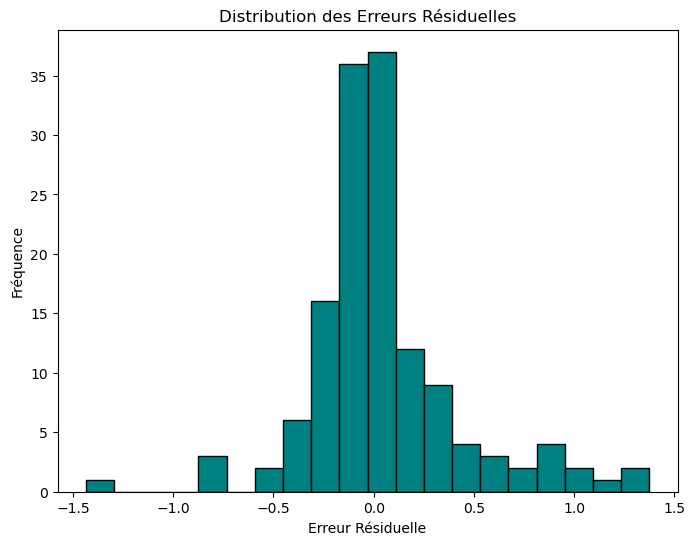

In [46]:
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
plt.hist(residuals, bins=20, color='teal', edgecolor='black')
plt.xlabel("Erreur Résiduelle")
plt.ylabel("Fréquence")
plt.title("Distribution des Erreurs Résiduelles")
plt.show()

### Courbe d'Apprentissage
Utiliser une courbe d’apprentissage pour voir comment la performance du modèle évolue en fonction de la taille des données d'entraînement.

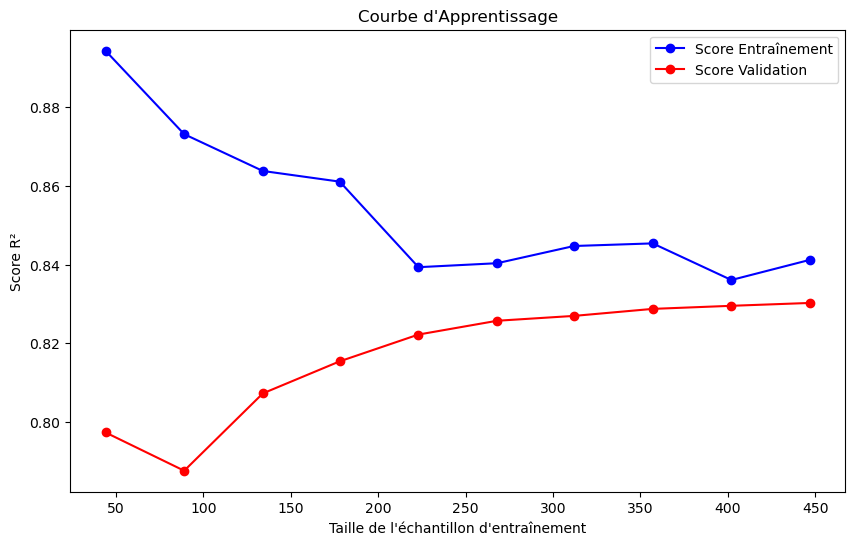

In [47]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    best_elastic_net, X_train_scaled, y_train, cv=5, scoring='r2', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10)
)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color="blue", label="Score Entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="red", label="Score Validation")
plt.xlabel("Taille de l'échantillon d'entraînement")
plt.ylabel("Score R²")
plt.legend(loc="best")
plt.title("Courbe d'Apprentissage")
plt.show()

### Graphique de l’Erreur en Fonction du Nombre d’Arbres
Si vous avez fait varier le paramètre n_estimators lors de la validation croisée, ce graphique montre l'impact du nombre d'arbres sur la performance.

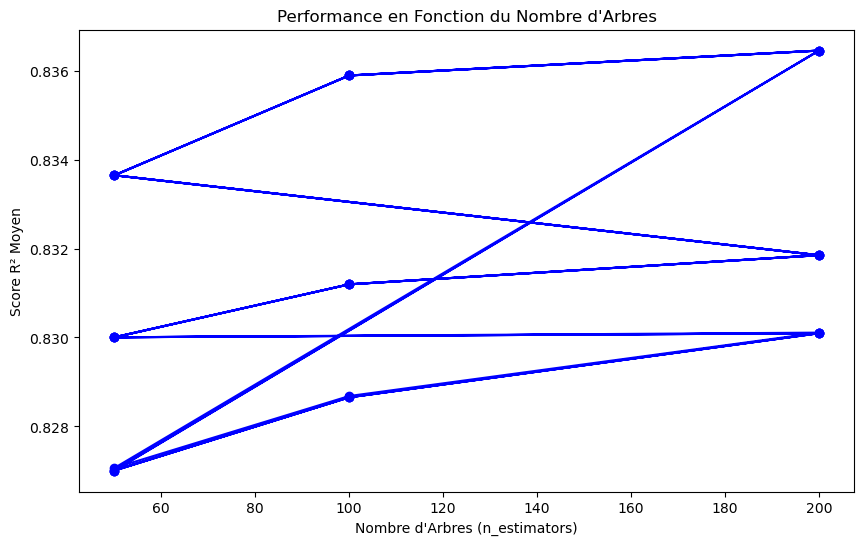

In [48]:
import pandas as pd

# Exemple si vous avez stocké les résultats dans `grid_search`
results = grid_search.cv_results_
n_estimators = [d['n_estimators'] for d in results['params']]
mean_test_score = results['mean_test_score']

plt.figure(figsize=(10, 6))
plt.plot(n_estimators, mean_test_score, marker='o', color='blue')
plt.xlabel("Nombre d'Arbres (n_estimators)")
plt.ylabel("Score R² Moyen")
plt.title("Performance en Fonction du Nombre d'Arbres")
plt.show()